In [1]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import the ML algorithm
from sklearn.linear_model import LinearRegression
#from pandas.core import datetools

from statsmodels.tools.eval_measures import rmse

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import datasets, linear_model

In [2]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Reading Data
data = pd.read_csv(r'E:\MYLEARN\2-ANALYTICS-DataScience\datasets\student.csv')
data.head()

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


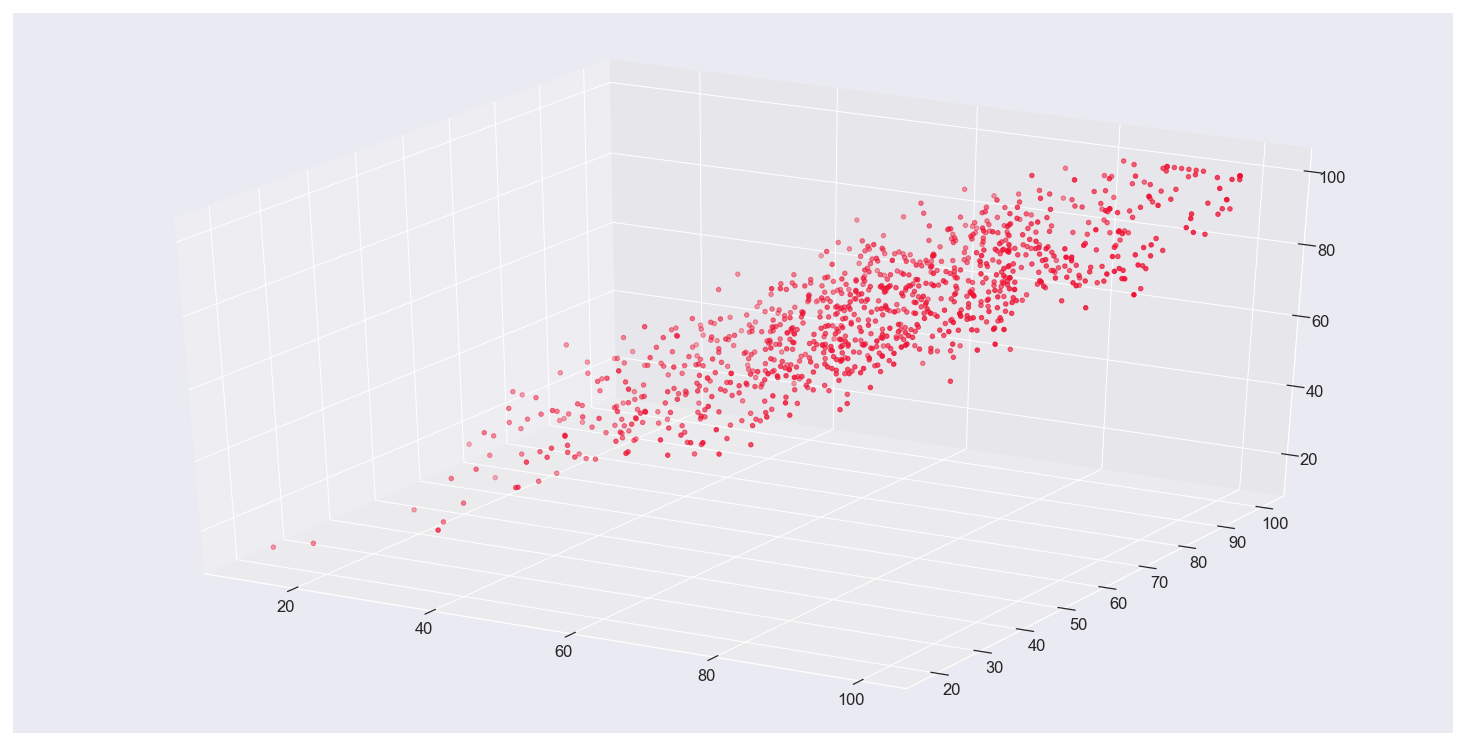

In [4]:
math  = data['Math'].values
read  = data['Reading'].values
write = data['Writing'].values

# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(math, read, write, color='#ef1234')
plt.show()

In [5]:
len(math)

1000

In [6]:
# generate our X, Y and β
m  = len(math)

x0 = np.ones(m)

X = np.array([x0, math, read]).T

# Initial Coefficients
B = np.array([0, 0, 0])
Y = np.array(write)

alpha = 0.0001

In [7]:
# cost function.

def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J


In [8]:
inital_cost = cost_function(X, Y, B)

print(inital_cost)

2470.11


#### we’ll reduce prediocally using Gradient Descent.

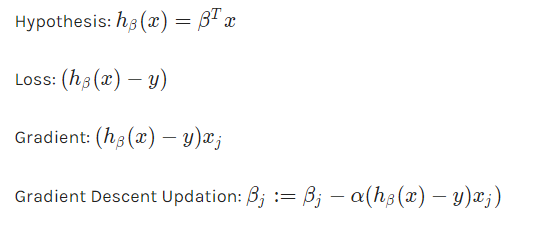

In [9]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [10]:
# compute final value of β

# 100000 Iterations
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)


In [11]:
# New Values of B
print(newB)

[-0.47889172  0.09137252  0.90144884]


In [12]:
# Final Cost of new B
print(cost_history[-1])

10.475123473539167


In [13]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

In [14]:
# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

In [15]:
Y_pred = X.dot(newB)

In [16]:
print(rmse(Y, Y_pred))
print(r2_score(Y, Y_pred))

4.5771439727277885
0.9097223273061554


In [ ]:
def rsqr()